In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.inspection import permutation_importance
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [119]:
df = pd.read_excel('Data_Pathrise.xlsx')

In [120]:
# Remove leading and trailing white spaces from column names using lambda function

df.rename(columns=lambda x: x.strip(), inplace=True)

In [121]:
df

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,2540,Withdrawn (Failed),Design,JUN18A,457.0,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,15,Male,Non-Hispanic White or Euro-American
2540,2541,Withdrawn (Failed),Data,JAN19B,488.0,0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7,Male,Non-Hispanic White or Euro-American
2541,2542,Active,SWE,SEP18C,NaN,0,Contractor,Bachelor's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,1.0,30,Female,Non-Hispanic White or Euro-American
2542,2543,Active,SWE,MAY18A,NaN,0,NaN,Master's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,2.0,10,Male,Decline to Self Identify


In [122]:
df.drop('id', axis=1, inplace=True)

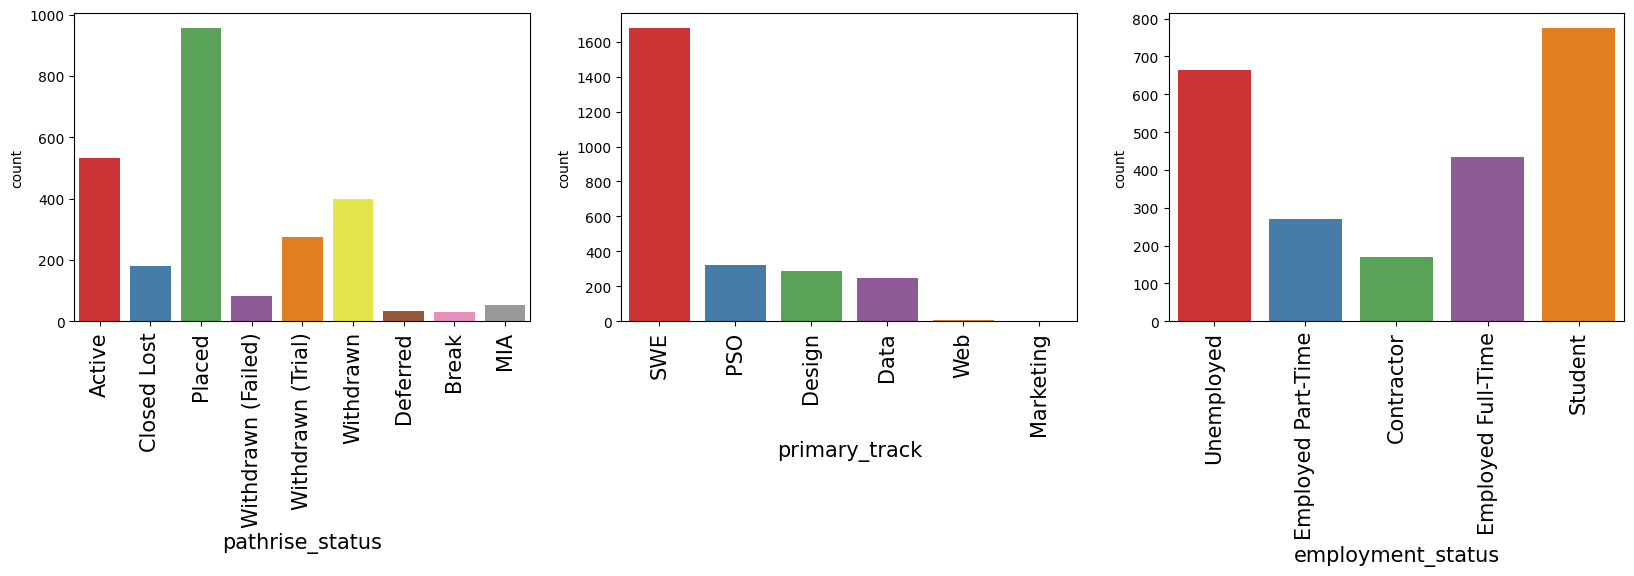

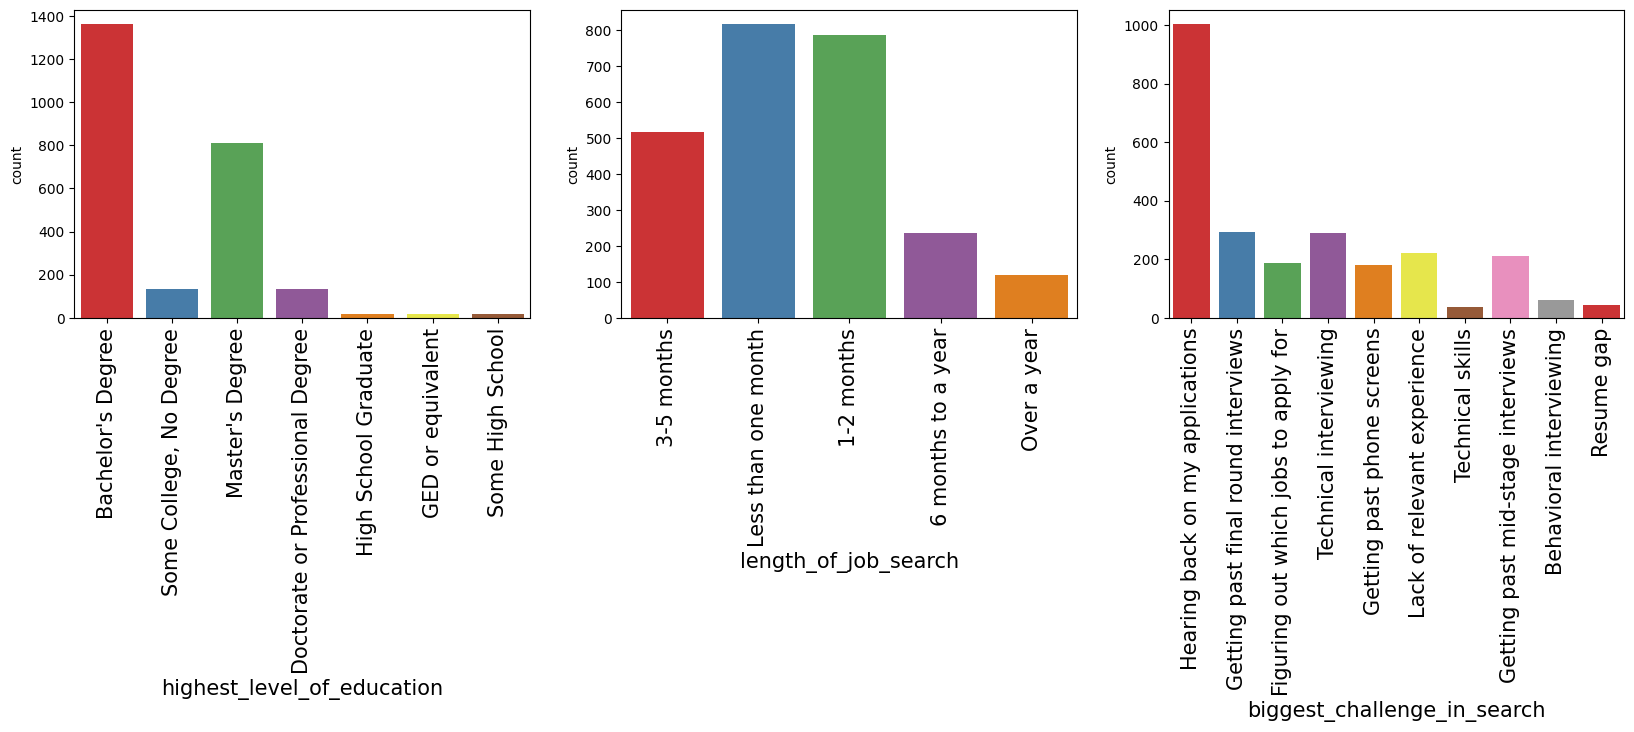

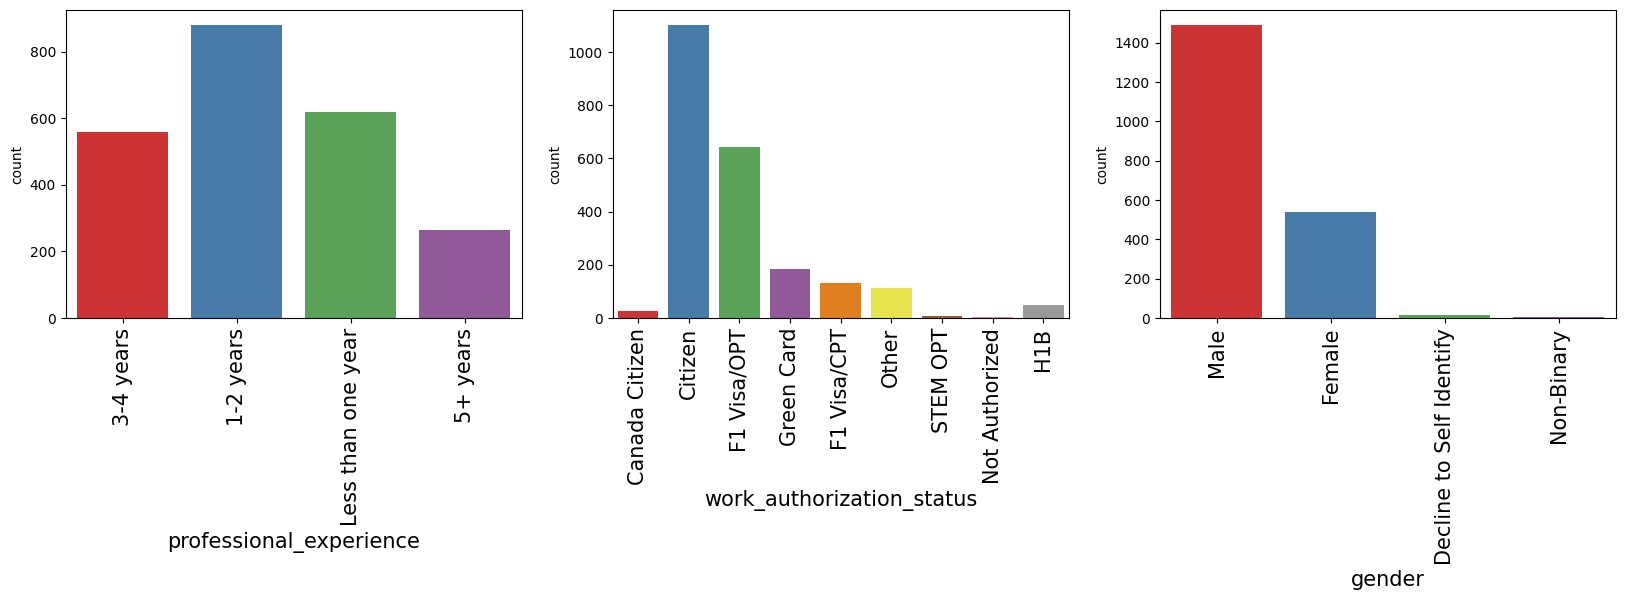

In [123]:
## This code will create subplots for each categorical variable and display them in rows with a maximum of 3 columns.
  #It will automatically adjust the number of rows and columns based on the number of categorical variables.

Categorical = ['pathrise_status','primary_track','employment_status','highest_level_of_education','length_of_job_search','biggest_challenge_in_search','professional_experience','work_authorization_status','gender']
i = 0
while i<9:
    fig = plt.figure(figsize = [20,4])
    plt.subplot(1,3,1)
    sns.countplot(x = Categorical[i], data=df, palette='Set1')
    plt.xticks(fontsize=15)
    plt.xlabel(Categorical[i],fontsize=15)
    plt.xticks(rotation= 90)
    i += 1

    plt.subplot(1,3,2)
    sns.countplot(x = Categorical[i], data=df, palette= 'Set1')
    plt.xticks(fontsize=15)
    plt.xlabel(Categorical[i],fontsize=15)
    plt.xticks(rotation= 90)

    i += 1

    if i==9:
        break
    plt.subplot(1,3,3)
    sns.countplot(x = Categorical[i], data=df, palette='Set1')
    plt.xticks(fontsize=15)
    plt.xlabel(Categorical[i],fontsize=15)
    plt.xticks(rotation= 90)

    i += 1
    plt.show()

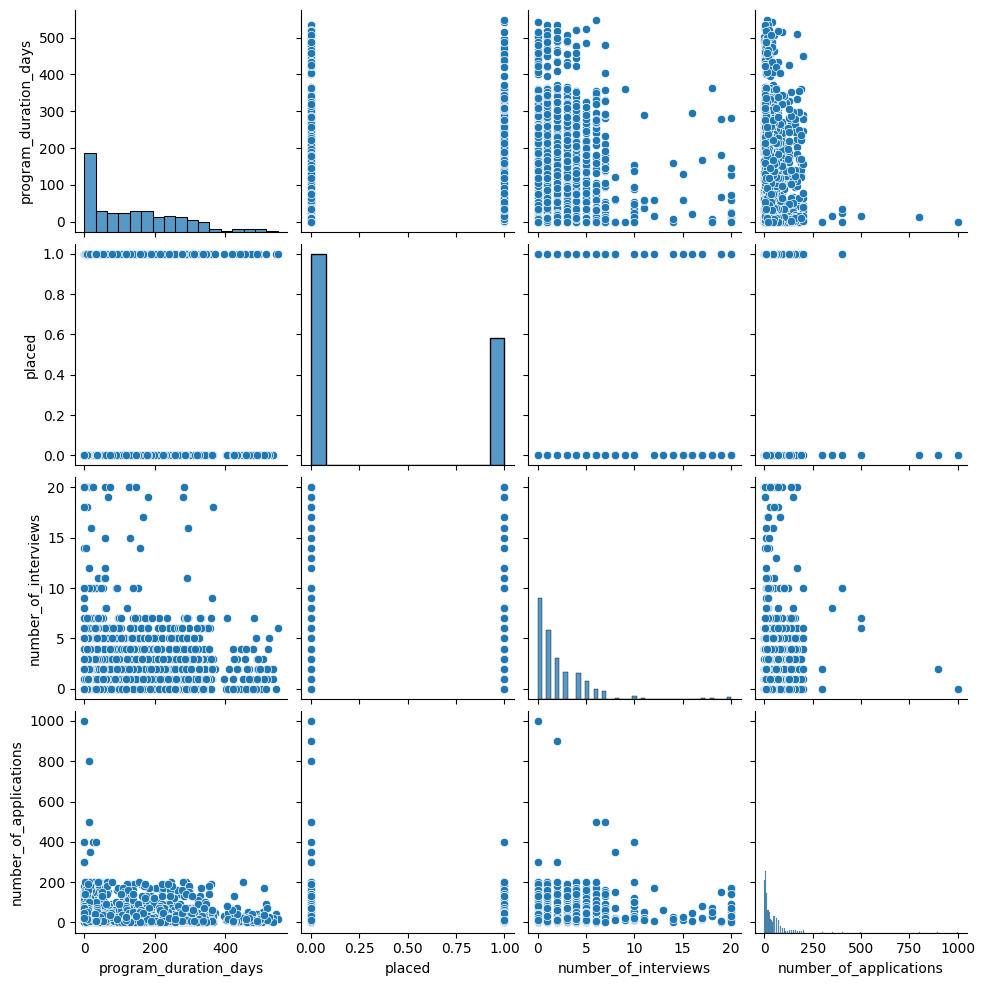

In [124]:
sns.pairplot(df)

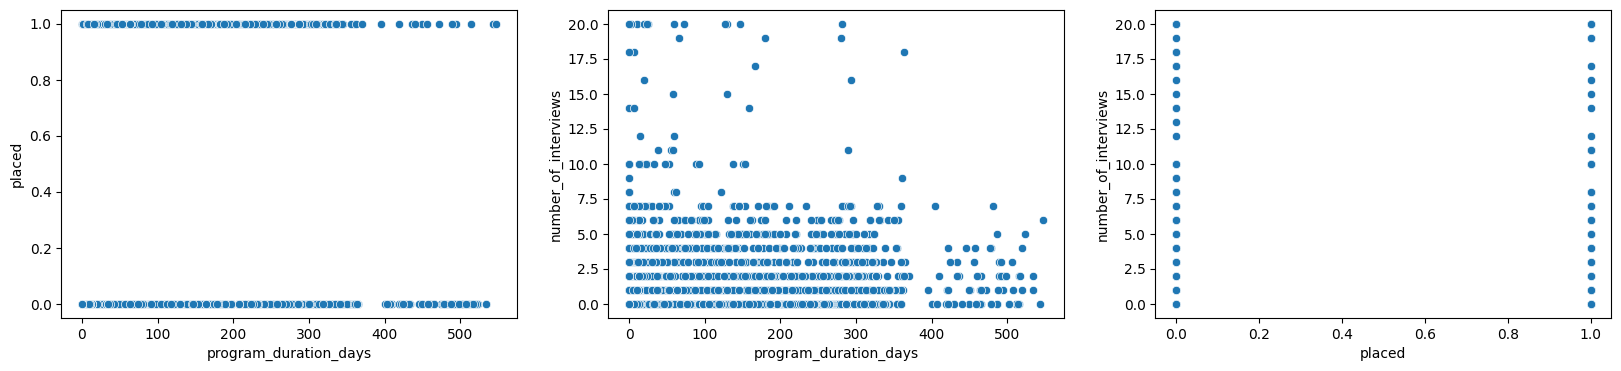

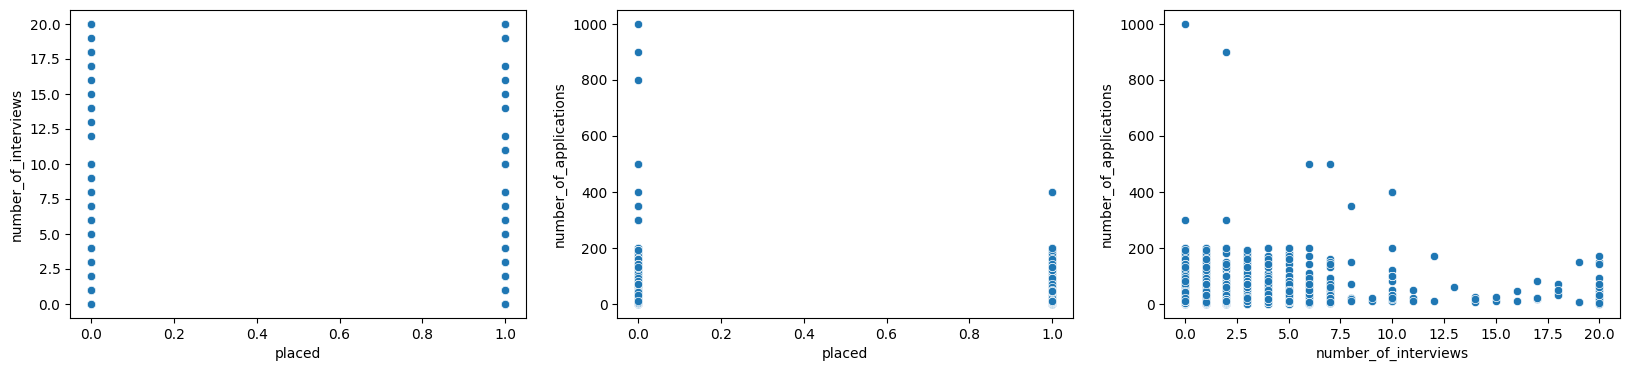

In [125]:
# Define the list of numeric columns for which scatterplots will be created
numeric_columns = ['program_duration_days', 'placed', 'number_of_interviews', 'number_of_applications']

# Initialize the loop counter
i = 0
# Iterate through the numeric columns to create scatterplots
while i < len(numeric_columns) - 2:  # Loop until the second-to-last element to avoid index out of range
    # Create a 1x3 subplot grid for three scatterplots side by side
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))

    # Scatterplot for the first and second numeric columns
    sns.scatterplot(x=numeric_columns[i], y=numeric_columns[i + 1], data=df, ax=axes[0])
    axes[0].set_xlabel(numeric_columns[i])
    axes[0].set_ylabel(numeric_columns[i + 1])

    # Scatterplot for the first and third numeric columns
    sns.scatterplot(x=numeric_columns[i], y=numeric_columns[i + 2], data=df, ax=axes[1])
    axes[1].set_xlabel(numeric_columns[i])
    axes[1].set_ylabel(numeric_columns[i + 2])

    # Scatterplot for the second and third numeric columns
    sns.scatterplot(x=numeric_columns[i + 1], y=numeric_columns[i + 2], data=df, ax=axes[2])
    axes[2].set_xlabel(numeric_columns[i + 1])
    axes[2].set_ylabel(numeric_columns[i + 2])

    # Increment the loop counter to move to the next set of numeric columns
    i += 1

    # Display the current set of scatterplots
    plt.show()


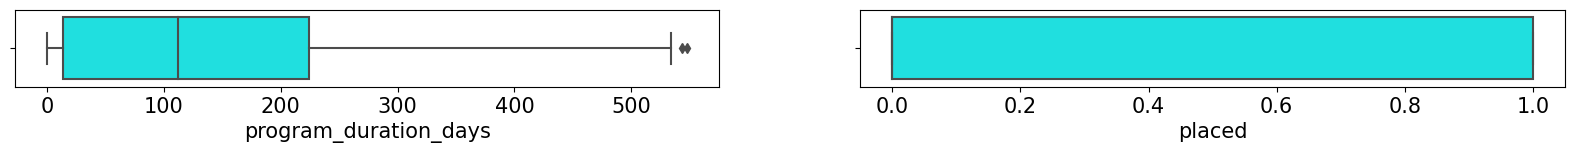

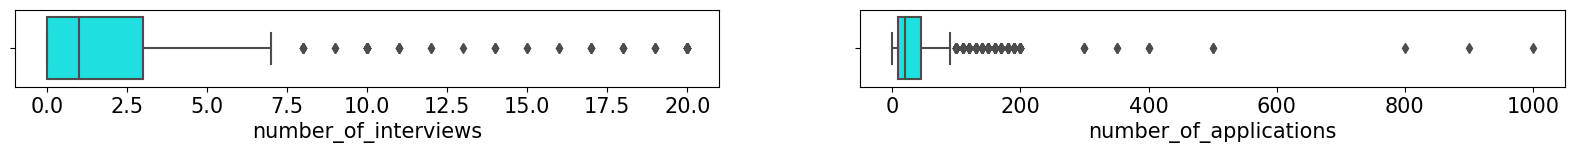

In [126]:
# This code generates side-by-side boxplots for each numerical variable in the DataFrame 'df'.

Numerical = ['program_duration_days','placed','number_of_interviews','number_of_applications']

i = 0
while i<4:
    fig = plt.figure(figsize = [20,1])
    plt.subplot(1,2,1)
    sns.boxplot(x = Numerical[i], data=df, color='cyan')
    plt.xticks(fontsize=15)
    plt.xlabel(Numerical[i],fontsize=15)
    i += 1

    plt.subplot(1,2,2)
    sns.boxplot(x = Numerical[i], data=df, color='cyan')
    plt.xticks(fontsize=15)
    plt.xlabel(Numerical[i],fontsize=15)
    i += 1
    plt.show()

<ipython-input-127-da45928f1f1a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

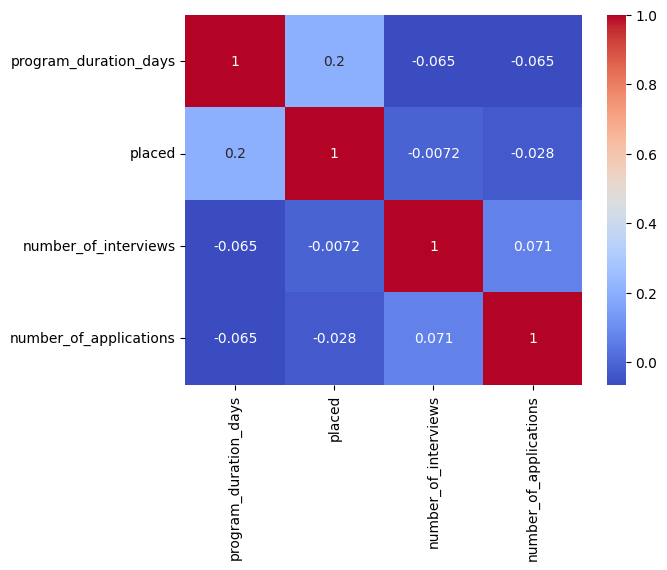

In [127]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

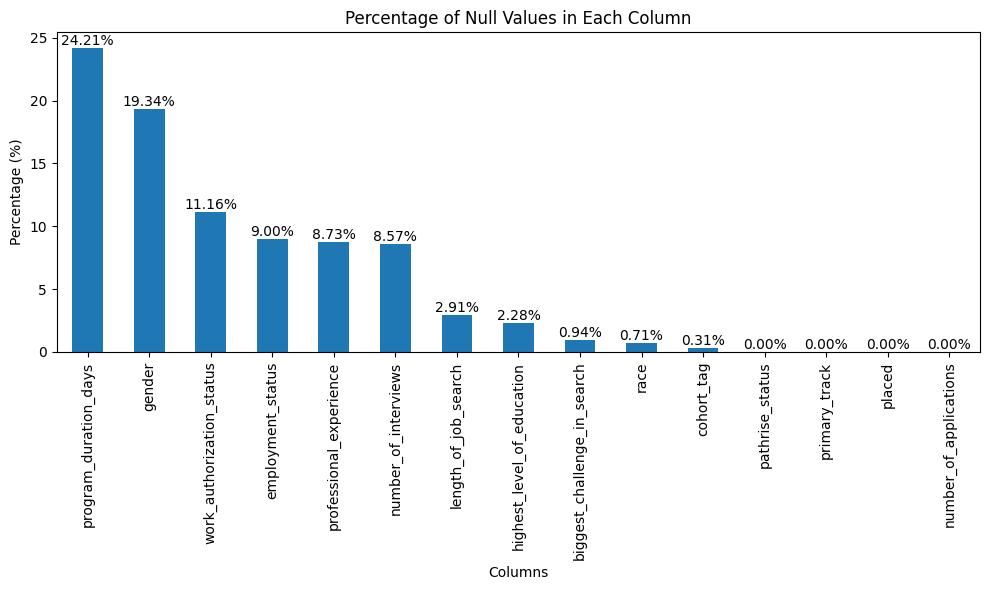

In [128]:
# finding percentage of the nulls on each column

null_percentage = (df.isnull().sum() / len(df)) * 100

# Sort columns by the percentage of null values in descending order
null_percentage = null_percentage.sort_values(ascending=False)

# Create a histogram to visualize the percentage of null values
plt.figure(figsize=(10, 6))
null_percentage.plot(kind='bar')
plt.title('Percentage of Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage (%)')

# Display the percentage values on top of each bar
for i, v in enumerate(null_percentage):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [129]:
df.drop(['biggest_challenge_in_search', 'number_of_applications', 'number_of_interviews'], axis=1, inplace=True)

In [130]:
# Create cross-tabulations for all pairs of columns and display them
# for col1 in df.columns:
#     if col1 != 'cohort_tag':
#         for col2 in df.columns:
#             if col2 != 'cohort_tag':
#                 print(f'Cross-tabulation between {col1} and {col2}:\n')
#                 print(pd.crosstab(df[col1], df[col2]))
#                 print('-' * 30)

In [131]:
# Extract the first three characters from the 'cohort_tag' column and store them in 'month_tag'.
df['month_tag'] = df['cohort_tag'].str[:3]

# Define the prefix for the year and add it to the two characters extracted from 'cohort_tag'.
year_to_add = '20'
df['year_tag'] = year_to_add + df['cohort_tag'].str[3:5]

# Sort the DataFrame by the specified column in ascending order (min to max)
column_to_sort = 'year_tag'
df = df.sort_values(by=column_to_sort)
# Reset the index after sorting
df = df.reset_index(drop=True)

# Remove rows with null values in cohort_tag column
df = df.dropna(subset=['cohort_tag'])

# Convert the 'year_tag' column from a string to an integer data type.
df['year_tag'] = df['year_tag'].astype(int)

df['tag'] = df['cohort_tag'].str[5:6]

In [132]:
# Filtering DataFrame: Keep only rows where the 'pathrise_status' column does not have the value 'Active'.
df = df[df['pathrise_status'] == 'Placed']
# Clean program_duration_days column
df = df[(df['program_duration_days'] != 0)]
df = df[(df['program_duration_days'] > 14)]
df = df[(df['program_duration_days'] < 400)]

In [133]:
# Clean race column
df['race'] = df['race'].astype('str')

def clean_race(x):
    x = x.replace("East Asian or Asian American","Asian-American")
    x = x.replace("Non-Hispanic White or Euro-American","Euro-American")
    x = x.replace("South Asian or Indian American","Indian-American")
    x = x.replace("Latino or Hispanic American","Hispanic-American")
    x = x.replace("Black, Afro-Caribbean, or African American","African-American")
    x = x.replace("Two or More Races","More-Races")
    x = x.replace("Decline to Self Identify","Decline-Identify")
    x = x.replace("Middle Eastern or Arab American","Arab-American")
    x = x.replace("Native American or Alaskan Native","Native-American")
    return(x)

df['race'] = df['race'].apply(clean_race)

In [134]:
def education(x):
    x = x.replace("Bachelor's Degree","Bachelor-Degree")
    x = x.replace("Master's Degree","Advanced-Degree")
    x = x.replace("Some College, No Degree","High-School")
    x = x.replace("Doctorate or Professional Degree","Advanced-Degree")
    x = x.replace("High School Graduate","High-School")
    x = x.replace("Some High School","Non-Degree")
    x = x.replace("GED or equivalent","High-School")
    return(x)

    df['highest_level_of_education'] = df['highest_level_of_education'].apply(education)

In [135]:
df.isna().sum()

pathrise_status                 0
primary_track                   0
cohort_tag                      0
program_duration_days           0
placed                          0
employment_status              95
highest_level_of_education     14
length_of_job_search           36
professional_experience        53
work_authorization_status     122
gender                        145
race                            0
month_tag                       0
year_tag                        0
tag                             0
dtype: int64

In [136]:
# replace missing values with Unknown in gender column
df['gender'].replace(np.nan, 'Unknown', inplace=True)

In [137]:
# Filling missing values in specified columns (employment_status, highest_level_of_education,
# length_of_job_search, professional_experience, work_authorization_status, race) with the most frequent value.

columns = [ 'highest_level_of_education',
           'professional_experience']

# Create a SimpleImputer with 'most_frequent' strategy and apply it to fill missing values
imputer = SimpleImputer(strategy='most_frequent')
df[columns] = imputer.fit_transform(df[columns])

# Create new columns with '_encoded' suffix for encoding
encoded_columns = [col + '_encoded' for col in columns]

# Initialize LabelEncoders for each object column and encode the data
label_encoders = {}
for column, encoded_column in zip(columns, encoded_columns):
    if df[column].dtype == 'object':  # Check if the column is of type 'object'
        label_encoder = LabelEncoder()
        df[encoded_column] = label_encoder.fit_transform(df[column])
        label_encoders[column] = label_encoder

In [138]:
df.columns

Index(['pathrise_status', 'primary_track', 'cohort_tag',
       'program_duration_days', 'placed', 'employment_status',
       'highest_level_of_education', 'length_of_job_search',
       'professional_experience', 'work_authorization_status', 'gender',
       'race', 'month_tag', 'year_tag', 'tag',
       'highest_level_of_education_encoded',
       'professional_experience_encoded'],
      dtype='object')

In [139]:
# Create a new DataFrame 'df_labeled' by dropping specific columns from the original DataFrame 'df'.
df_labeled = df.drop([ 'cohort_tag', 'month_tag',
       'highest_level_of_education', 'length_of_job_search',
       'professional_experience', 'tag', 'placed'], axis=1)

In [140]:
# Perform one-hot encoding on the 'gender' column in the DataFrame 'df_labeled'.
df_labeled = pd.get_dummies(df_labeled, columns=['year_tag', 'race', 'gender',
                                                 'primary_track', 'pathrise_status',
                                                 'employment_status', 'work_authorization_status'])
#df_labeled.drop(['tag'], axis=1, inplace=True)

In [141]:
df_labeled

,program_duration_days,highest_level_of_education_encoded,professional_experience_encoded,year_tag_2018,year_tag_2019,year_tag_2020,year_tag_2021,race_African-American,race_Arab-American,race_Asian-American,...,employment_status_Student,employment_status_Unemployed,work_authorization_status_Canada Citizen,work_authorization_status_Citizen,work_authorization_status_F1 Visa/CPT,work_authorization_status_F1 Visa/OPT,work_authorization_status_Green Card,work_authorization_status_H1B,work_authorization_status_Other,work_authorization_status_STEM OPT
0,50.0,0,2,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
1,159.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,114.0,4,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,185.0,4,3,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
5,304.0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,285.0,4,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2515,195.0,5,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2519,19.0,5,3,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
2531,243.0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [142]:
scaler = MinMaxScaler()
model=scaler.fit(df_labeled)
scaled_data=model.transform(df_labeled)

In [143]:
# Split the DataFrame into features (x) and target variable (y)
x = df_labeled.drop('program_duration_days',axis=1)
y = df_labeled['program_duration_days']

# Split the data into training and testing sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=123)

In [144]:
# Create a Linear Regression model.
linear_regression = LinearRegression()

# Train the Linear Regression model using the training data.
linear_regression.fit(x_train, y_train)

# Use the trained model to make predictions on the test data.
prediction = linear_regression.predict(x_test)

<ipython-input-145-1b5b3c2dda78>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual,bins=50)


<Axes: xlabel='program_duration_days', ylabel='Density'>

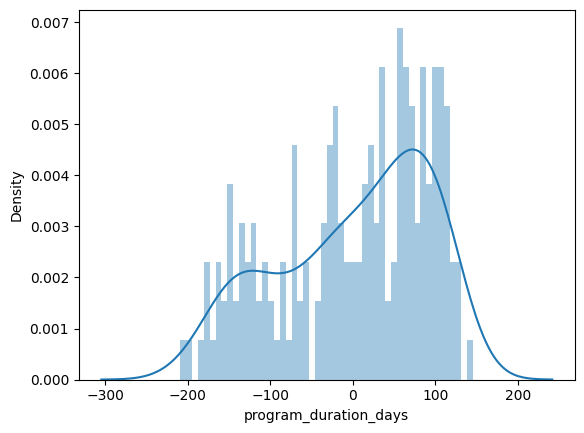

In [145]:
# Calculate the residuals by subtracting the predicted values from the actual target values.
residual = prediction - y_test

# Visualize the distribution of residuals using a histogram with specified bins.
sns.distplot(residual,bins=50)

In [146]:
# Calculate and print the Mean Absolute Error (MAE) for model evaluation.
print('MAE =', metrics.mean_absolute_error(y_test,prediction))

MAE = 77.40508540174167


In [147]:
metrics.r2_score(prediction, y_test)

-10.197776657314343

In [148]:
metrics.mean_squared_error(prediction, y_test)

8161.886893599054

In [149]:
metrics.mean_squared_error(y_test, prediction, squared=False)

90.3431618530094

Text(0.5, 1.0, 'Feature Importances')

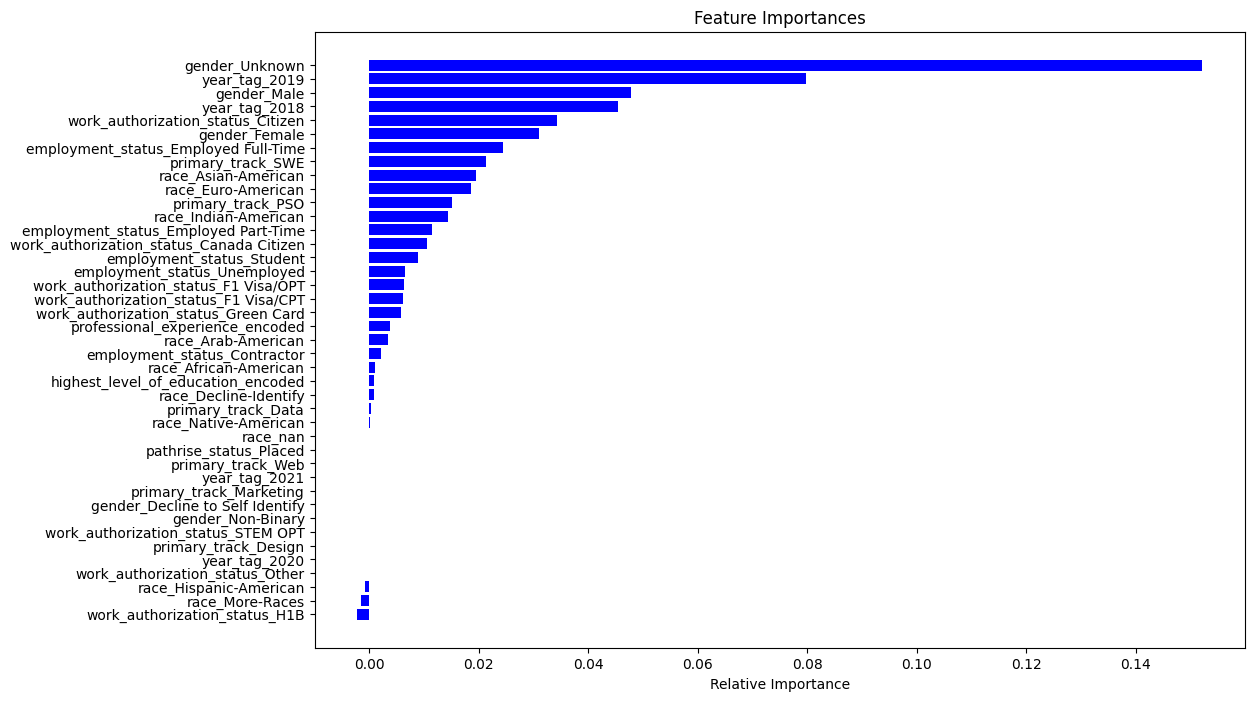

In [150]:
# compute permutation feature importance
importances = permutation_importance(linear_regression, x_test, y_test, n_repeats=30, random_state=42)

# get importances and their indices
importances_mean = importances.importances_mean
indices = np.argsort(importances_mean)

# plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(range(len(indices)), importances_mean[indices], color='b', align='center')
plt.yticks(range(len(indices)), [x.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importances')